In [1]:
import pandas as pd 

In [2]:
moviemeta = pd.read_csv('movies_metadata.csv', low_memory=False)


In [3]:
moviemeta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
moviemeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
meanvote = moviemeta['vote_average'].mean()
print(meanvote)

5.618207215134185


In [6]:
minimumvote = moviemeta['vote_count'].quantile(0.90)
print(minimumvote)

160.0


In [7]:
q_movies = moviemeta.copy().loc[moviemeta['vote_count'] >= minimumvote]
q_movies.shape

(4555, 24)

In [8]:
def weighted_rating(x, minimumvote=minimumvote, meanvote=meanvote):
    voters = x['vote_count']
    avg_vote = x['vote_average']
    return (voters / (voters + minimumvote) * avg_vote) + (minimumvote / (minimumvote + voters)) * mean

In [9]:
def weighted_rating(x, minimumvote, meanvote, mean):
    voters = x['vote_count']
    avg_vote = x['vote_average']
    return (voters / (voters + minimumvote) * avg_vote) + (minimumvote / (minimumvote + voters)) * mean


In [10]:
mean = 0 # assign the mean value you want to use


In [11]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1, args=(minimumvote, meanvote, mean))


In [12]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1, args=(minimumvote, meanvote, mean))
q_movies = q_movies.sort_values('score', ascending=False)


In [13]:
pd.set_option('display.precision', 2)


In [14]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.34
834,The Godfather,6024.0,8.5,8.28
12481,The Dark Knight,12269.0,8.3,8.19
2843,Fight Club,9678.0,8.3,8.17
292,Pulp Fiction,8670.0,8.3,8.15
351,Forrest Gump,8147.0,8.2,8.04
522,Schindler's List,4436.0,8.3,8.01
15480,Inception,14075.0,8.1,8.01
23673,Whiplash,4376.0,8.3,8.01
1154,The Empire Strikes Back,5998.0,8.2,7.99


In [15]:
moviemeta['original_language'].value_counts()

original_language
en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: count, Length: 92, dtype: int64

In [16]:
moviemeta['original_language'].value_counts()[0:5]

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
Name: count, dtype: int64

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

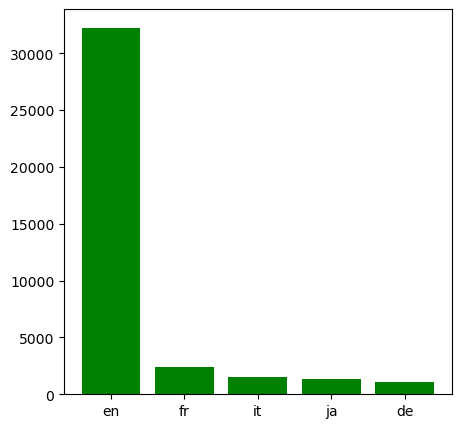

In [19]:
plt.figure(figsize=(5,5))
plt.bar(list(moviemeta['original_language'].value_counts()[0:5].keys()),list(moviemeta['original_language'].value_counts()[0:5]),color="g")
plt.show()

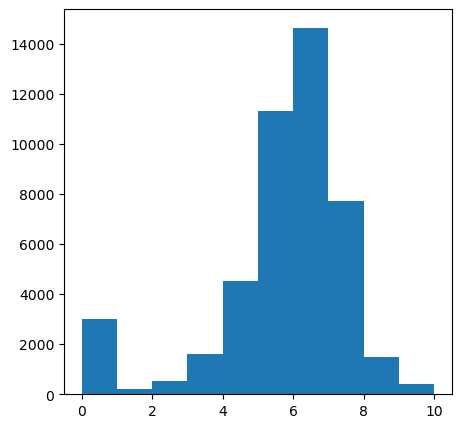

In [20]:
plt.figure(figsize=(5,5))
plt.hist(moviemeta['vote_average'])
plt.show()

In [21]:
moviemeta['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [22]:
#importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [23]:
#average_rating
a=moviemeta
a=a.groupby('title')['vote_count'].mean()
a

title
!Women Art Revolution                                                    2.0
#1 Cheerleader Camp                                                     23.0
#Horror                                                                 53.0
#chicagoGirl                                                             1.0
$1,000 on the Black                                                      2.0
                                                                        ... 
هیچ کجا هیچ کس                                                           1.0
‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen     1.0
’Round Midnight                                                         20.0
…And the Fifth Horseman Is Fear                                          4.0
ファンタスティポ                                                                 0.0
Name: vote_count, Length: 42277, dtype: float64

In [24]:
sorted_votecount_wise_movie = a.sort_values(ascending=False)

In [25]:
sorted_votecount_wise_movie

title
Inception                                         14075.0
Avatar                                            12114.0
Deadpool                                          11444.0
Interstellar                                      11187.0
Django Unchained                                  10297.0
                                                   ...   
Eye of the Hurricane                                  0.0
Extralarge: Black Magic                               0.0
External Affairs                                      0.0
Perry Mason: The Case of the Heartbroken Bride        0.0
ファンタスティポ                                              0.0
Name: vote_count, Length: 42277, dtype: float64

In [26]:
b=moviemeta.groupby('title')['vote_count'].count()
b.tail()

title
هیچ کجا هیچ کس                                                          1
‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen    1
’Round Midnight                                                         1
…And the Fifth Horseman Is Fear                                         1
ファンタスティポ                                                                1
Name: vote_count, dtype: int64

In [27]:
#making a new dataframe
new_record = pd.DataFrame()

new_record['vote_average']=a

In [28]:
new_record['count of total votecount'] = b

new_record.head()

,vote_average,count of total votecount
title,,
!Women Art Revolution,2.0,1
#1 Cheerleader Camp,23.0,1
#Horror,53.0,1
#chicagoGirl,1.0,1
"$1,000 on the Black",2.0,1


In [29]:
new_record.columns

Index(['vote_average', 'count of total votecount'], dtype='object')

<Axes: >

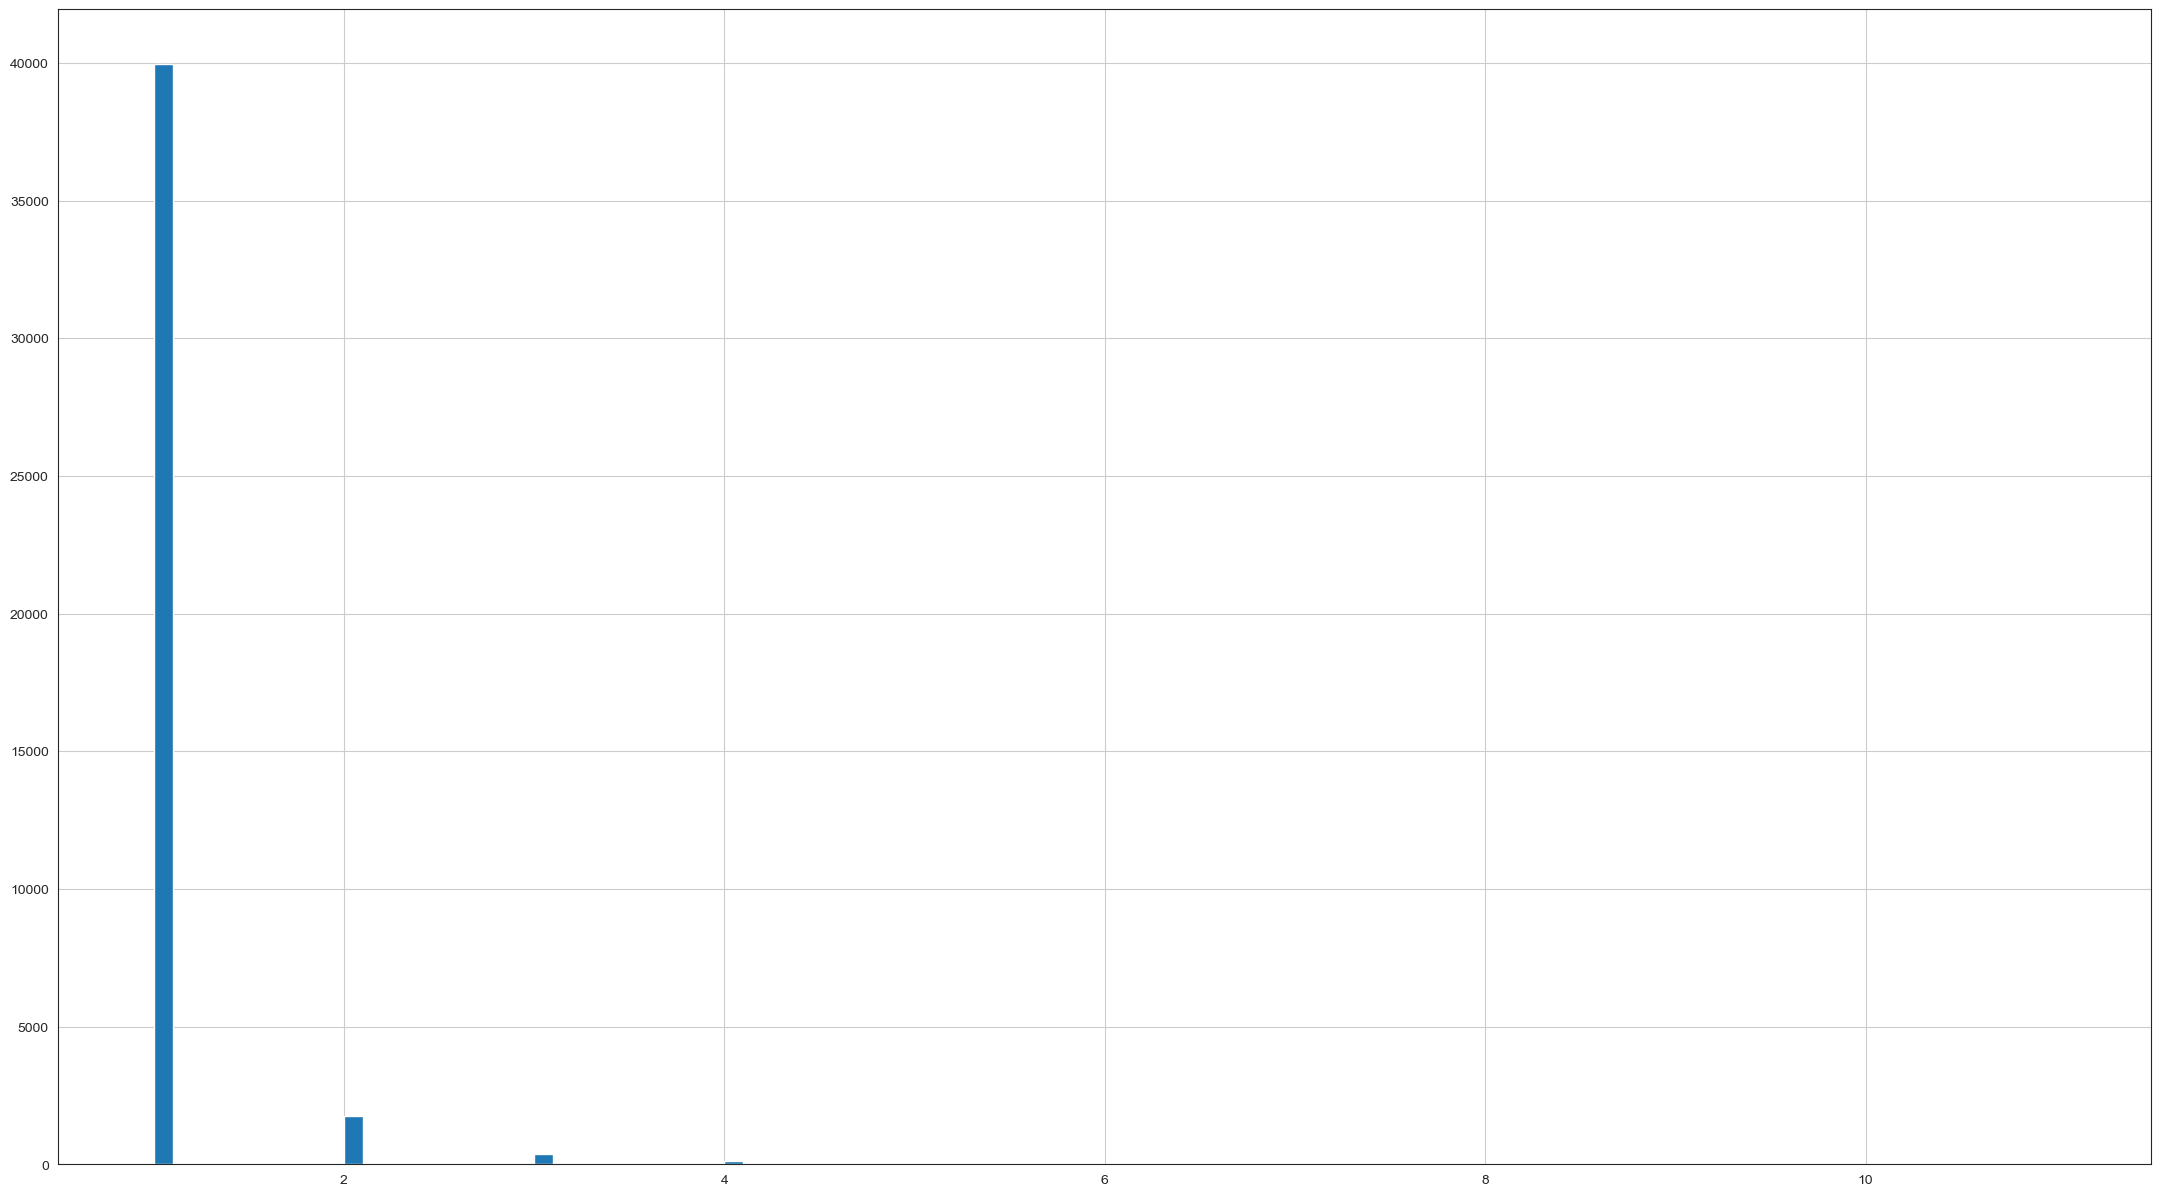

In [30]:
#plot graph of  'num of ratings column'
plt.figure(figsize=(27, 15))
new_record['count of total votecount'].hist(bins = 100)

<Axes: >

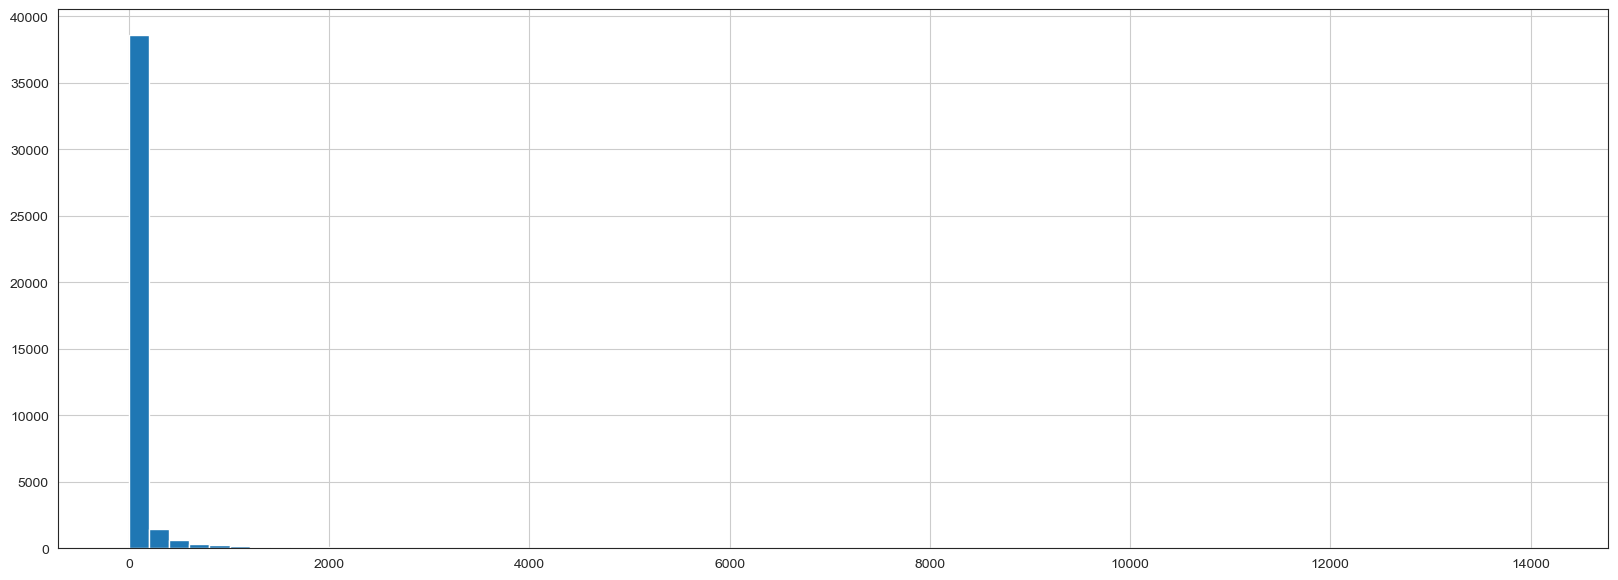

In [31]:
#plot graph of 'ratings' column
plt.figure(figsize =(20, 7))

new_record['vote_average'].hist(bins = 70)

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x600 with 0 Axes>

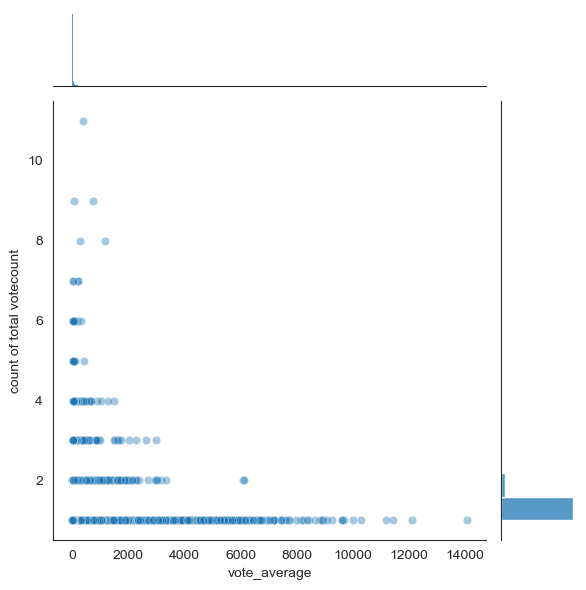

In [32]:
plt.figure(figsize=(8,6))
sns.jointplot(x='vote_average', y='count of total votecount', data=new_record, alpha=0.4)

In [33]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(7)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.34
834,The Godfather,6024.0,8.5,8.28
12481,The Dark Knight,12269.0,8.3,8.19
2843,Fight Club,9678.0,8.3,8.17
292,Pulp Fiction,8670.0,8.3,8.15
351,Forrest Gump,8147.0,8.2,8.04
522,Schindler's List,4436.0,8.3,8.01


In [34]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(5)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.34
834,The Godfather,6024.0,8.5,8.28
12481,The Dark Knight,12269.0,8.3,8.19
2843,Fight Club,9678.0,8.3,8.17
292,Pulp Fiction,8670.0,8.3,8.15


In [35]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(1)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.34


In [36]:
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(2)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.34
834,The Godfather,6024.0,8.5,8.28
